# Predicting Retention Rates

Given the preliminary feature analysis conducted in the 'Exploratory Analysis.ipynb', we have found that the following variables affect retention rates.
* list features

Now, we are going to conduct further analysis (linear regression) in order to explore the true relationship between these features and retention rates. 

### Loading in Packages and Data

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Prep plotting aesthetics
# Set font size names
SMALL_SIZE = 14
MEDIUM_SIZE = 16
# Set font sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
# Set figure size
plt.rcParams["figure.figsize"] = (14, 8) # size of the figure plotted

# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")

data.head()

,Unnamed: 0,UNITID,INSTNM,CITY,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,...,MD_FAMINC,FAMINC_IND,MN_EARN_WNE_P10,UGDS_MEN,UGDS_WOMEN,GRADS,RET_FT4_POOLED,RET_FTL4_POOLED,PRGMOFR,ADMCON7
0,0,100654,Alabama A & M University,Normal,4,1,1,5,12.0,NaN,...,23553,10340.346032,35500,0.3978,0.6022,884.0,0.5533,NaN,NaN,1.0
1,1,100663,University of Alabama at Birmingham,Birmingham,4,1,1,5,12.0,NaN,...,34489,30607.18029,48400,0.3816,0.6184,8685.0,0.8477,NaN,NaN,1.0
2,2,100690,Amridge University,Montgomery,4,2,1,5,12.0,NaN,...,15033.5,20596.158491,47600,0.2886,0.7114,477.0,0.5000,NaN,NaN,NaN
3,3,100706,University of Alabama in Huntsville,Huntsville,4,1,1,5,12.0,NaN,...,44787,27941.821963,52000,0.5891,0.4109,1972.0,0.8234,NaN,NaN,1.0
4,4,100724,Alabama State University,Montgomery,4,1,1,5,12.0,NaN,...,22080.5,8551.802974,30600,0.3605,0.6395,458.0,0.6164,NaN,NaN,1.0


### Linear Regression

In [13]:
def filtered_df_two_columns(df, col1, col2):
    """
    Input: the dataframe and 2 variable column names
    Output: returns a new DataFrame that only contains values in both columns (no NA)
    """
    # Check that the input DataFrame contains both column names
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError("Input DataFrame does not contain both specified column names")

    # Select only the specified columns
    selected_cols = [col1, col2]
    new_df = df[selected_cols]

    # Use pandas' built-in methods to check which cells have numbers
    is_numeric = pd.to_numeric(new_df.iloc[:, 0], errors="coerce").notnull() & pd.to_numeric(new_df.iloc[:, 1], errors="coerce").notnull()

    # Filter the DataFrame to keep only the rows with numbers in both columns
    filtered_df = new_df.loc[is_numeric]

    return filtered_df

In [14]:
# Creating filtered data for 4-year institutions
filtered_adm_rate_and_four_year = filtered_df_two_columns(data, 'ADM_RATE', 'RET_FT4')

# Creating filtered data for less than 4-year institutions
filtered_adm_rate_and_less_four_year = filtered_df_two_columns(data, 'ADM_RATE', 'RET_FTL4')

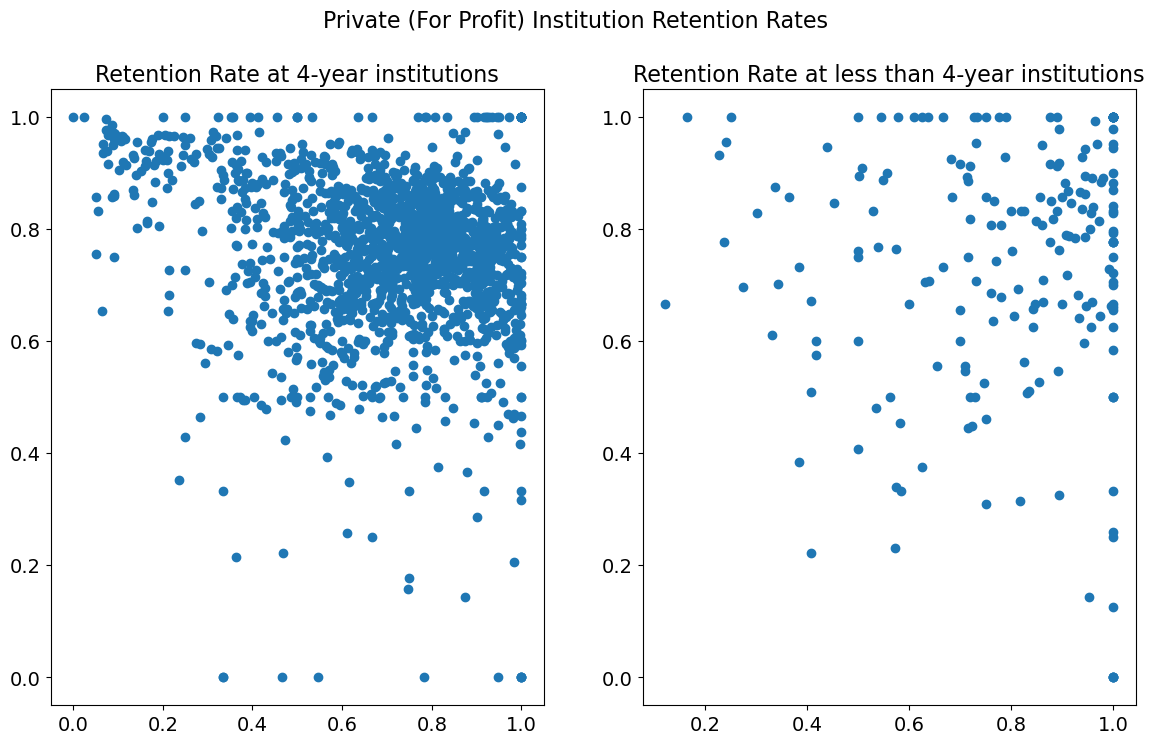

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Private (For Profit) Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.scatter(filtered_adm_rate_and_four_year.ADM_RATE, filtered_adm_rate_and_four_year.RET_FT4)

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.scatter(filtered_adm_rate_and_less_four_year.ADM_RATE, filtered_adm_rate_and_less_four_year.RET_FTL4)

plt.show()

In [16]:
# Pearson correlation coefficient 
def pearson_corr_coef(x, y):
    """
    Input: two lists of equal length
    Output: returns an array with the Pearson correlation coefficient
    """
    # Checking if the values in the list are the same
    if len(x) !=  len(y):
        raise ValueError("Input lists must have the same length")

    # Find Covariance
    covariance = np.cov(x, y)

    # Standard deviation of x and y
    stdx = np.std(x)
    stdy = np.std(y)

    # Returning Correlation coefficient
    return covariance / (stdx * stdy)

In [17]:
# 4-year
pearson_corr_coef(filtered_adm_rate_and_four_year.ADM_RATE, filtered_adm_rate_and_four_year.RET_FT4)

# less than 4-year
pearson_corr_coef(filtered_adm_rate_and_less_four_year.ADM_RATE, filtered_adm_rate_and_less_four_year.RET_FTL4)

array([[ 0.9656183 , -0.01185325],
       [-0.01185325,  1.04609297]])

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def prediction_analysis(filtered_data):
    """
    Input: Filtered Dataframe that only has two columns
    Performs a simple linear regression analysis on the input data and generates 
    predictions based on the input variables.
    """
    # Check that the input DataFrame contains only two columns
    if len(filtered_data.columns) < 2:
        raise ValueError("Input DataFrame contains less than 2 columns (Must only include 2)")
    if len(filtered_data.columns) > 2:
        raise ValueError("Input DataFrame contains more than 2 columns (Must only include 2)")

    # Fit a simple linear regression model to the input data
    model = LinearRegression()
    X = filtered_data.iloc[:, 0].values.reshape(-1, 1)
    y = filtered_data.iloc[:, 1].values.reshape(-1, 1)
    model.fit(X, y)

    # Generate predictions for the output column based on the input variables
    pred_col = model.predict(X)

    return pred_col

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def regression_analysis_results(x_col, y_col, pred_col):
    """
    Input: Columns containing the x values, actual values, and predicted values
    Performs a regression analysis to determine how well the model predicts the actual values.
    Calculates and returns the R-squared value and generates a scatter plot of the predicted values 
    versus the actual values.
    """
    # Check that the input DataFrame contains both columns
    if len(y_col) != len(pred_col):
        raise ValueError("Input columns are not the same length")

    # Calculate the R-squared value
    r_squared = r2_score(y_col, pred_col)

    # Generate a scatter plot of the predicted values versus the actual values
    plt.scatter(y_col, pred_col)
    plt.plot(x_col, pred_col, color = 'red', linewidth = 2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression Analysis Results')
    plt.show()

    return r_squared

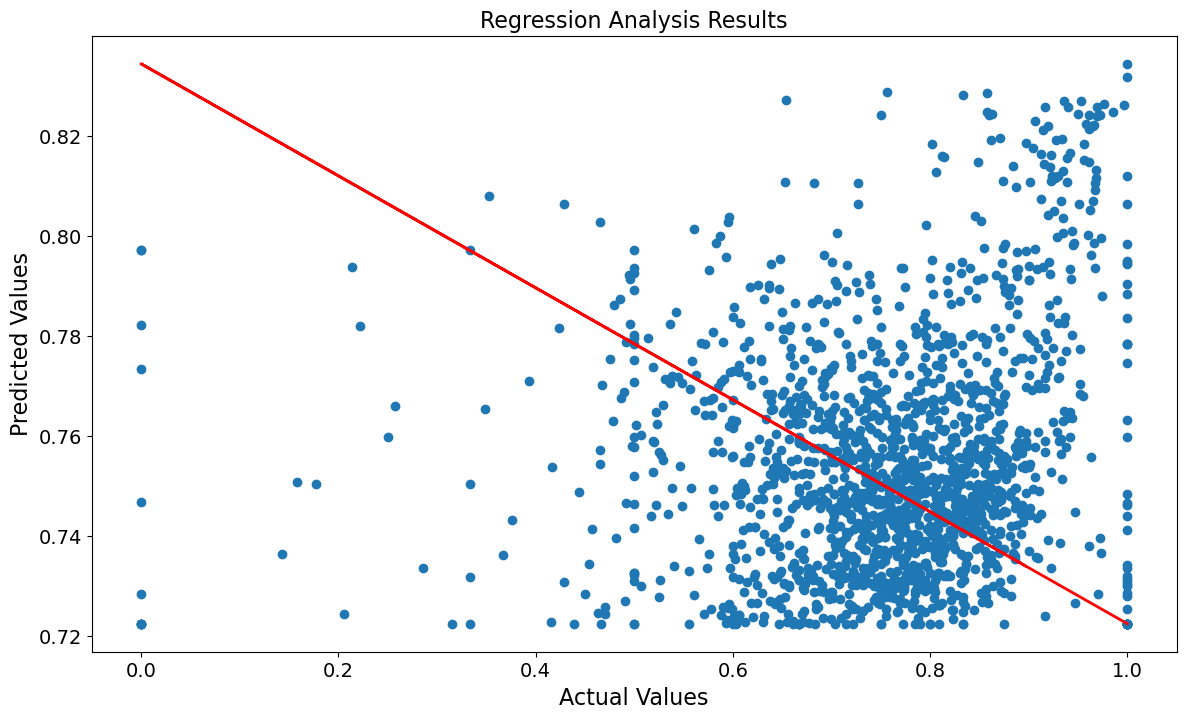

0.028278697918843854

In [20]:
# Retention Rate Predictions based on Four-Years
admission_prediction_four = prediction_analysis(filtered_adm_rate_and_four_year)
regression_analysis_results(filtered_adm_rate_and_four_year.ADM_RATE, filtered_adm_rate_and_four_year.RET_FT4, admission_prediction_four)

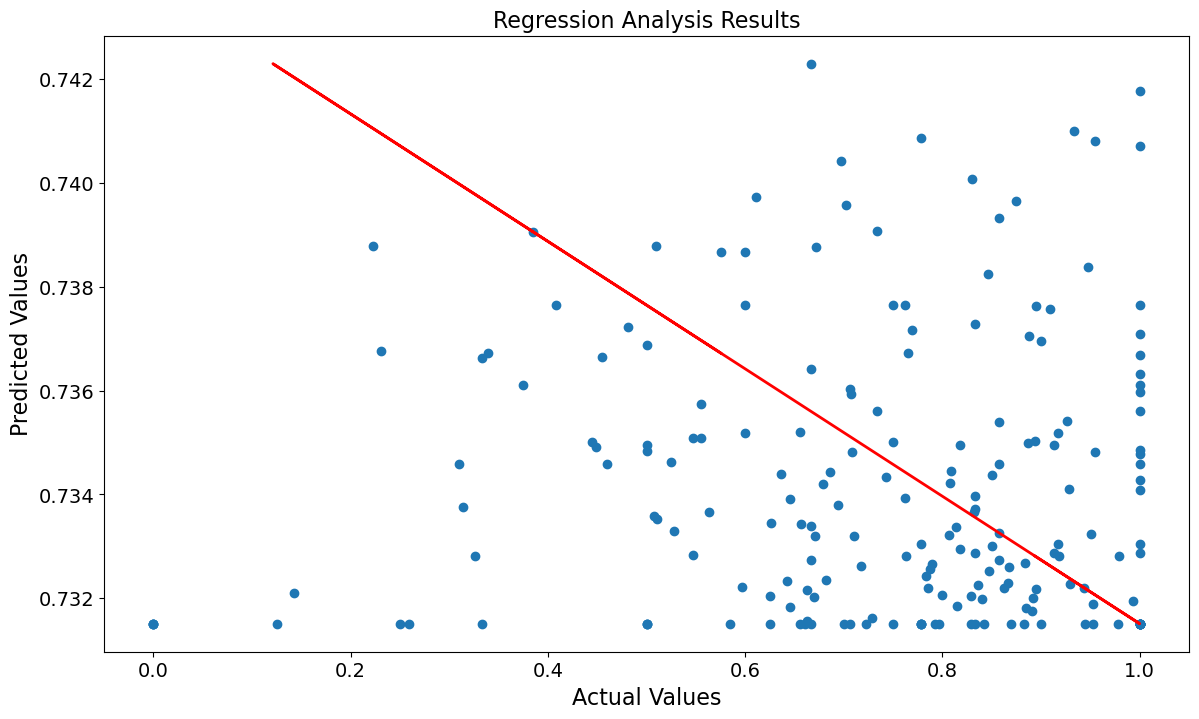

0.00013909112717636063

In [21]:
# Retention Rate Predictions based on Less-than-four-years
admission_prediction_less_four = prediction_analysis(filtered_adm_rate_and_less_four_year)
regression_analysis_results(filtered_adm_rate_and_less_four_year.ADM_RATE, filtered_adm_rate_and_less_four_year.RET_FTL4, admission_prediction_less_four)